Імпорт бібліотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

Дізнаємось все потрібне про тренувальний датасет

In [2]:
DatasetTrain = pd.read_csv('application_train.csv')

In [3]:
print(DatasetTrain.shape)
DatasetTrain.head()

(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Подивимось на типи даних датасету

In [4]:
DatasetTrain.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

На кількість пропущених значень

In [5]:
print(DatasetTrain.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


На дублікати

In [6]:
DatasetTrain[DatasetTrain.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

[0 rows x 122 columns]

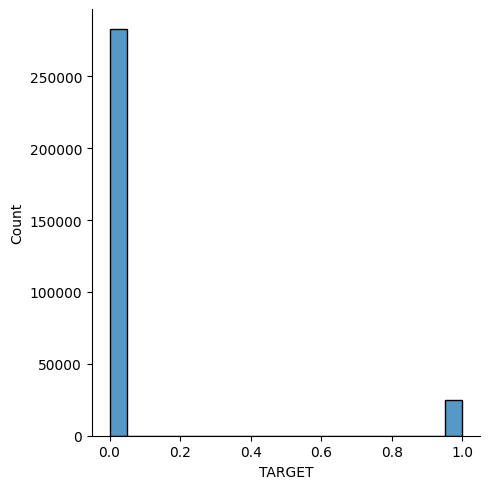

In [7]:
sns.displot(DatasetTrain["TARGET"])

Бачимо, датасет не збалансований

In [8]:
DatasetTrain.describe(include="all")

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

<AxesSubplot: >

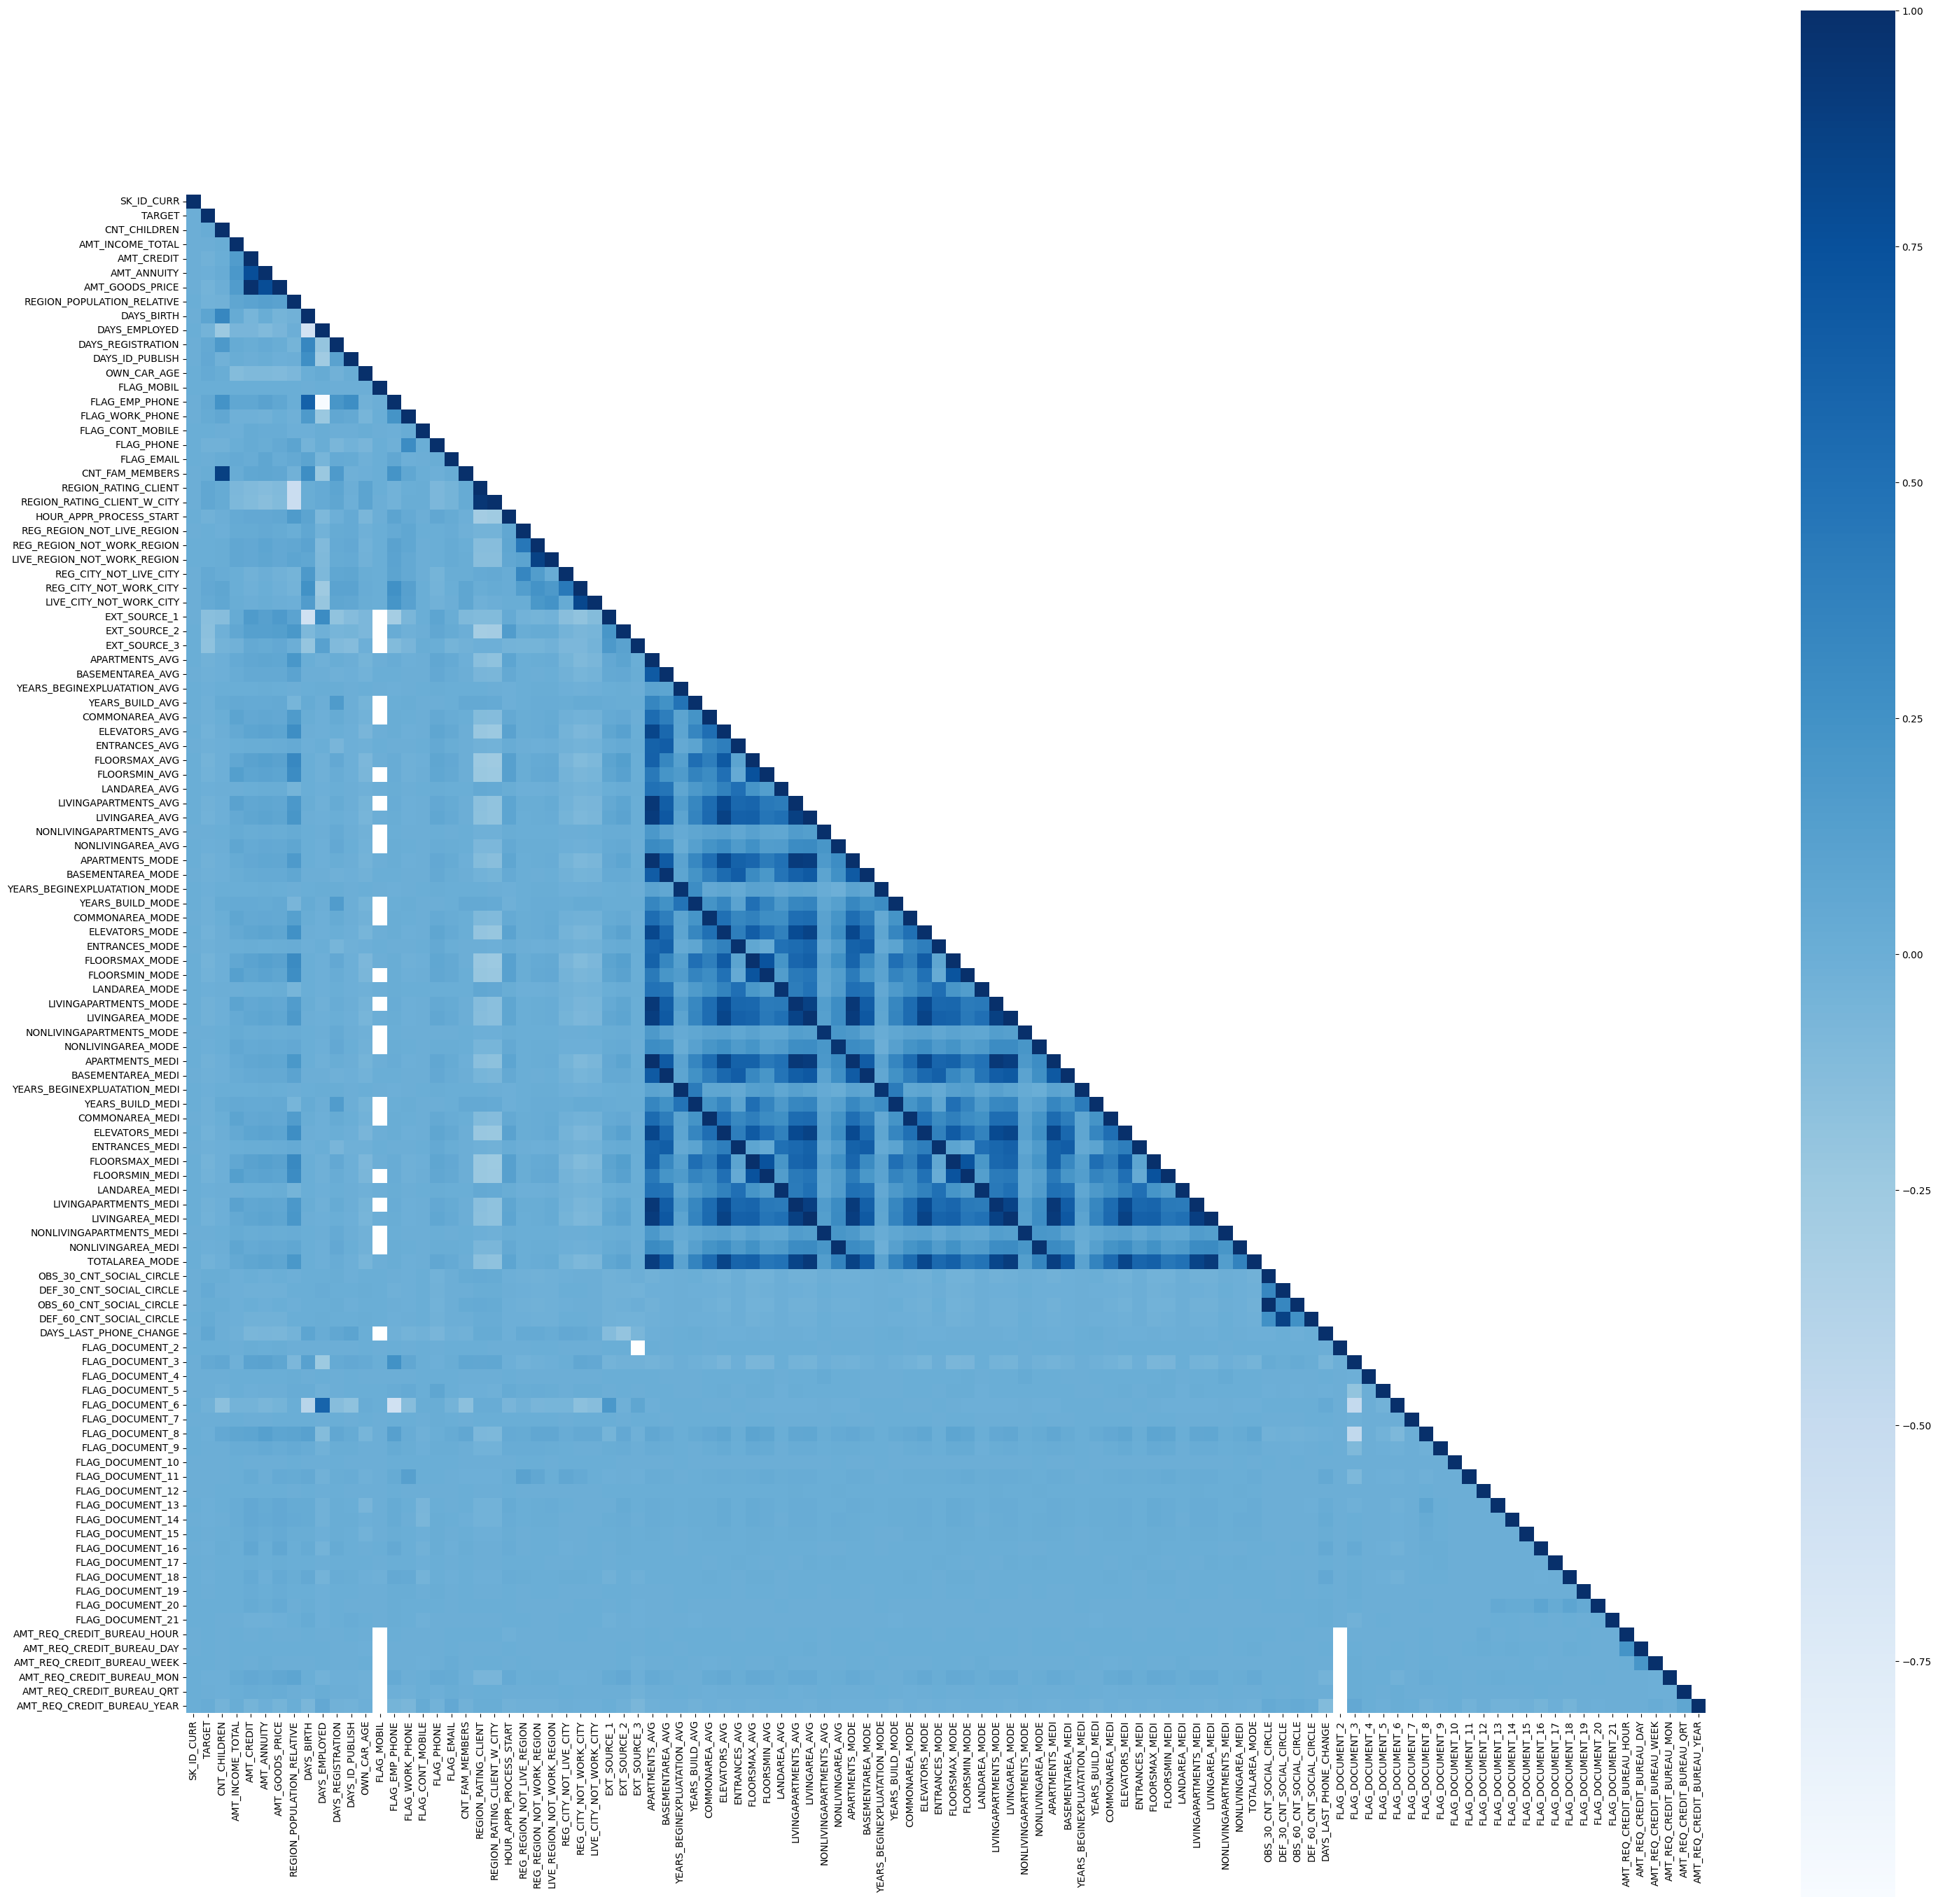

In [9]:
CorrMatrix = DatasetTrain.corr(numeric_only = True)
mask = np.array(CorrMatrix)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(35, 35)
sns.heatmap(CorrMatrix, cmap = "Blues", mask = mask, square = True)

Багато сильнокорельованих стовпців, почистимо від них датасет

In [10]:
HighCorr = []
for i in range(len(CorrMatrix.columns)):
    for j in range(i + 1, len(CorrMatrix.columns)):
        if abs(CorrMatrix.iloc[i,j]) > 0.75:
            HighCorr.append((CorrMatrix.columns[i], CorrMatrix.columns[j]))
delete = []
for pair in HighCorr:
    if pair[0] not in delete:
        delete.append(pair[1])
DatasetTrain = DatasetTrain.drop(delete, axis=1)

Також від стовпців із повністю негативних значень 

In [11]:
minus = []
for column in DatasetTrain.columns:
    if DatasetTrain[column].dtype != "object" and DatasetTrain[column].max() < 0:
        minus.append(column)
DatasetTrain = DatasetTrain.drop(minus, axis=1)

Виділимо числові стовпці

In [12]:
NumericCols = DatasetTrain.select_dtypes(include = ['int64', 'float64']).columns

Але цільовий стовпець та номер не можна вважати числовими

In [13]:
NumericCols = NumericCols.delete(0)
NumericCols = NumericCols.delete(0)

Подивимось на розподіли

array([[<AxesSubplot: title={'center': 'CNT_CHILDREN'}>,
        <AxesSubplot: title={'center': 'AMT_INCOME_TOTAL'}>,
        <AxesSubplot: title={'center': 'AMT_CREDIT'}>,
        <AxesSubplot: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot: title={'center': 'DAYS_EMPLOYED'}>,
        <AxesSubplot: title={'center': 'DAYS_REGISTRATION'}>,
        <AxesSubplot: title={'center': 'DAYS_ID_PUBLISH'}>,
        <AxesSubplot: title={'center': 'OWN_CAR_AGE'}>],
       [<AxesSubplot: title={'center': 'FLAG_MOBIL'}>,
        <AxesSubplot: title={'center': 'FLAG_WORK_PHONE'}>,
        <AxesSubplot: title={'center': 'FLAG_CONT_MOBILE'}>,
        <AxesSubplot: title={'center': 'FLAG_PHONE'}>,
        <AxesSubplot: title={'center': 'FLAG_EMAIL'}>,
        <AxesSubplot: title={'center': 'REGION_RATING_CLIENT'}>,
        <AxesSubplot: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot: title={'center': 'REG_REGION_NOT_LIVE_REGION'}>],
       [<AxesSubplot: title=

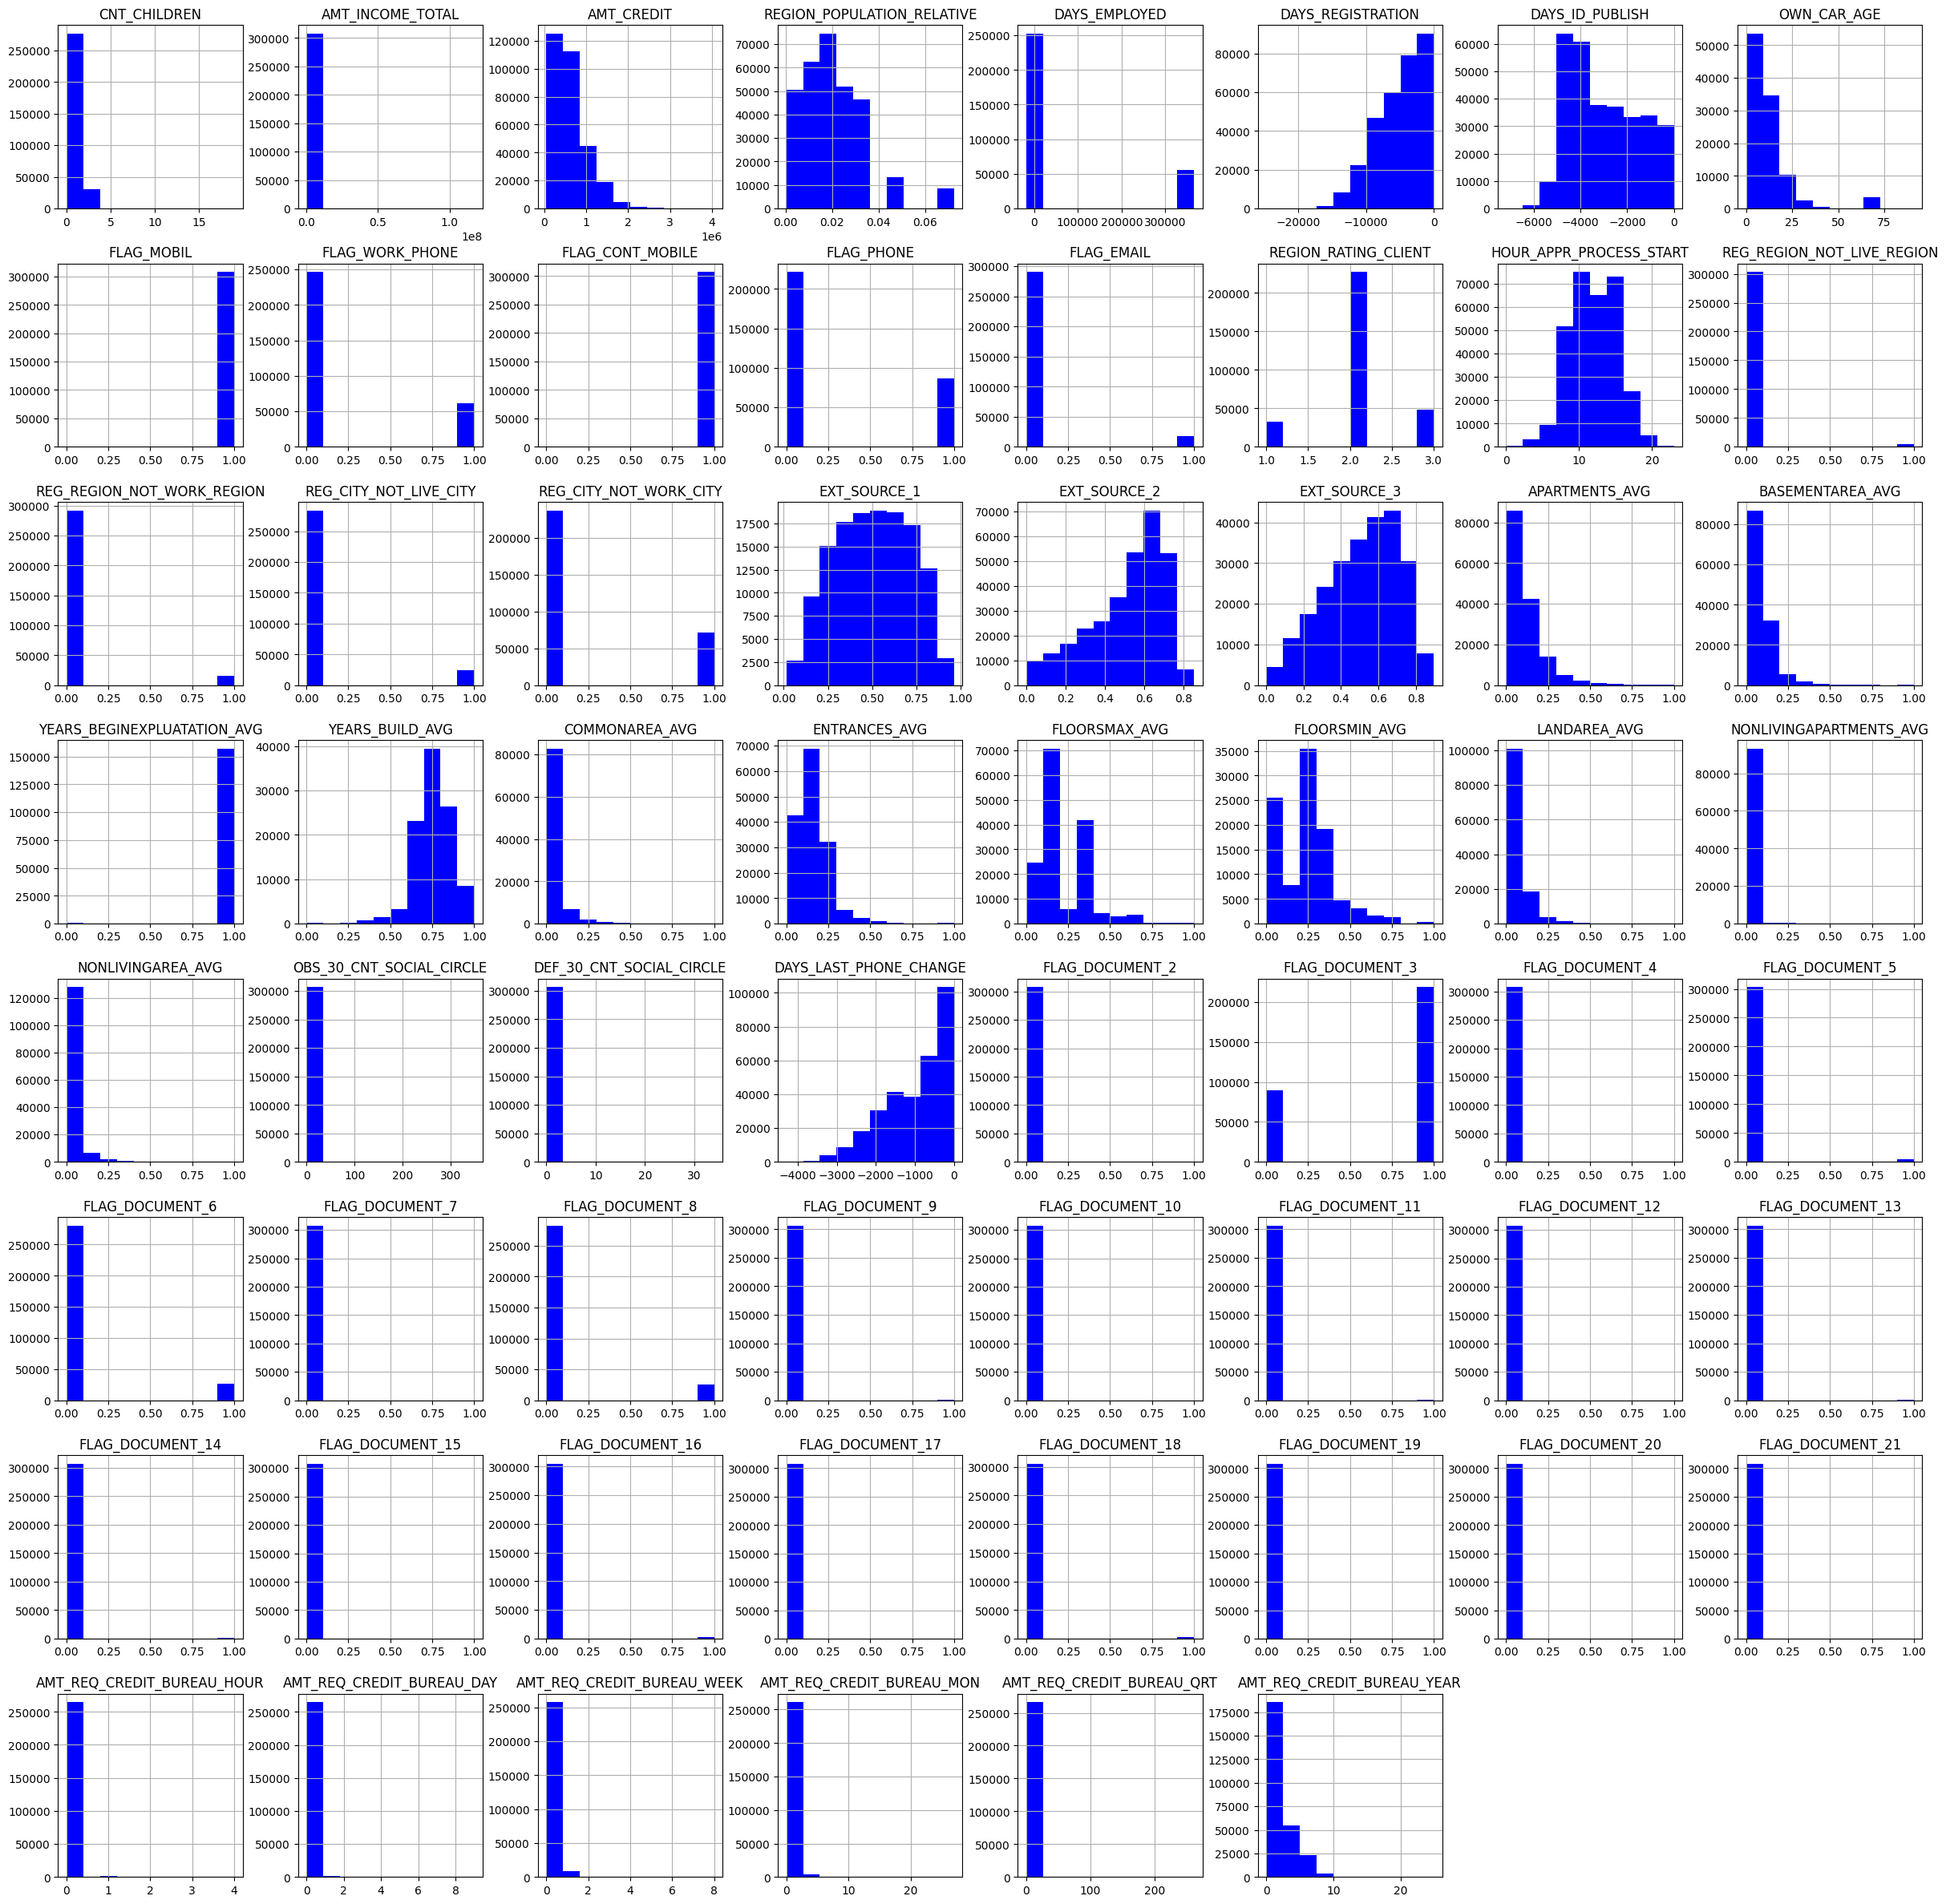

In [14]:
DatasetTrain[NumericCols].hist(figsize = (30, 30), color = 'b')

Насправді деякі з цих стовпців категоріальні. Виправимо списки числових і категоріальних стовпців

In [15]:
NumericCols = NumericCols.drop(["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "REG_REGION_NOT_LIVE_REGION", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"])

ObjectCols = DatasetTrain.select_dtypes(include = ['object']).columns
CategoricCols = ObjectCols.union(["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "REG_REGION_NOT_LIVE_REGION", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"])

Подивимось на викиди у boxplot-ах

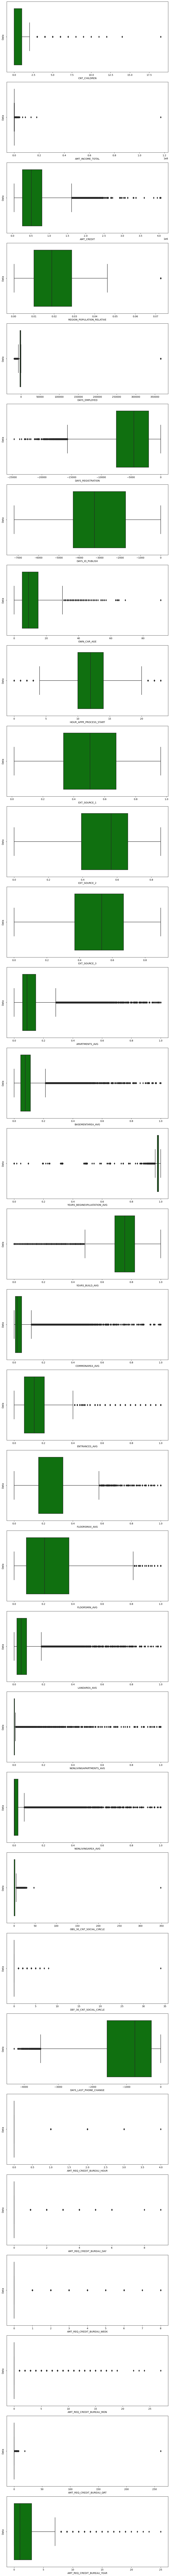

In [16]:
fig, axes = plt.subplots(nrows=len(NumericCols), ncols=1, figsize=(10, 150))
for i, column in enumerate(NumericCols):
    sns.boxplot(x = DatasetTrain[column], ax = axes[i], color = "green")
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Data', fontsize=10)
plt.tight_layout()
plt.show()

І також на гістограми 

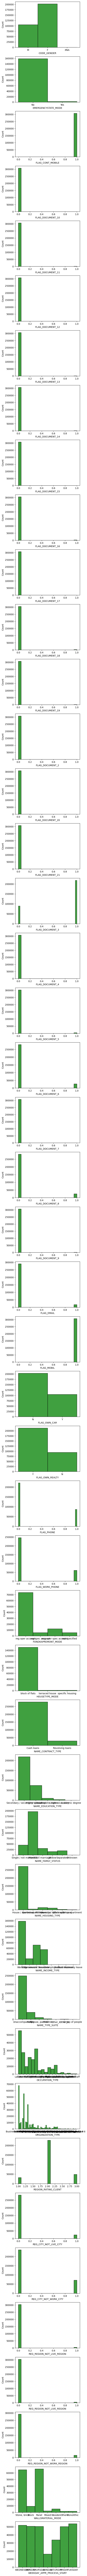

In [17]:
fig, axes = plt.subplots(nrows = len(CategoricCols), ncols = 1)
fig.set_size_inches(5, 200)
for i, column in enumerate(CategoricCols):
    sns.histplot(DatasetTrain[column], kde = False, ax = axes[i], color = "green")
plt.show()

Тепер проробимо весь той самий алгоритм з тестовим датасетом

In [18]:
DatasetTest = pd.read_csv('application_test.csv')

In [19]:
print(DatasetTest.shape)
DatasetTest.head()

(48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [20]:
DatasetTest.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [21]:
print(DatasetTest.isnull().sum())

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64


In [22]:
DatasetTest[DatasetTest.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, ...]
Index: []

[0 rows x 121 columns]

In [23]:
DatasetTest.describe(include="all")

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count    48744.000000              48744       48744        48744   
unique            NaN                  2           2            2   
top               NaN         Cash loans           F            N   
freq              NaN              48305       32678        32311   
mean    277796.676350                NaN         NaN          NaN   
std     103169.547296                NaN         NaN          NaN   
min     100001.000000                NaN         NaN          NaN   
25%     188557.750000                NaN         NaN          NaN   
50%     277549.000000                NaN         NaN          NaN   
75%     367555.500000                NaN         NaN          NaN   
max     456250.000000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count            48744  48744.000000      4.874400e+04  4.874400e+04   
unique               2           NaN               NaN           NaN   
top                  Y           NaN               NaN           NaN   
freq             33658           NaN               NaN           NaN   
mean               NaN      0.397054      1.784318e+05  5.167404e+05   
std                NaN      0.709047      1.015226e+05  3.653970e+05   
min                NaN      0.000000      2.694150e+04  4.500000e+04   
25%                NaN      0.000000      1.125000e+05  2.606400e+05   
50%                NaN      0.000000      1.575000e+05  4.500000e+05   
75%                NaN      1.000000      2.250000e+05  6.750000e+05   
max                NaN     20.000000      4.410000e+06  2.245500e+06   

          AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count    48720.000000     4.874400e+04  ...     48744.000000          48744.0   
unique            NaN              NaN  ...              NaN              NaN   
top               NaN              NaN  ...              NaN              NaN   
freq              NaN              NaN  ...              NaN              NaN   
mean     29426.240209     4.626188e+05  ...         0.001559              0.0   
std      16016.368315     3.367102e+05  ...         0.039456              0.0   
min       2295.000000     4.500000e+04  ...         0.000000              0.0   
25%      17973.000000     2.250000e+05  ...         0.000000              0.0   
50%      26199.000000     3.960000e+05  ...         0.000000              0.0   
75%      37390.500000     6.300000e+05  ...         0.000000              0.0   
max     180576.000000     2.245500e+06  ...         1.000000              0.0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count           48744.0          48744.0               42695.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean                0.0              0.0                   0.002108   
std                 0.0              0.0                   0.046373   
min                 0.0              0.0                   0.000000   
25%                 0.0              0.0                   0.000000   
50%                 0.0              0.0                   0.000000   
75%                 0.0              0.0                   0.000000   
max                 0.0              0.0                   2.000000   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                42695.000000                42695.000000   
unique                        NaN                         NaN   
top                           NaN                         NaN   
freq                          NaN                         NaN   
mean                     0.001803                    0.002787   
std                      0.046132                    0.054037   
min                      0.000000   

<AxesSubplot: >

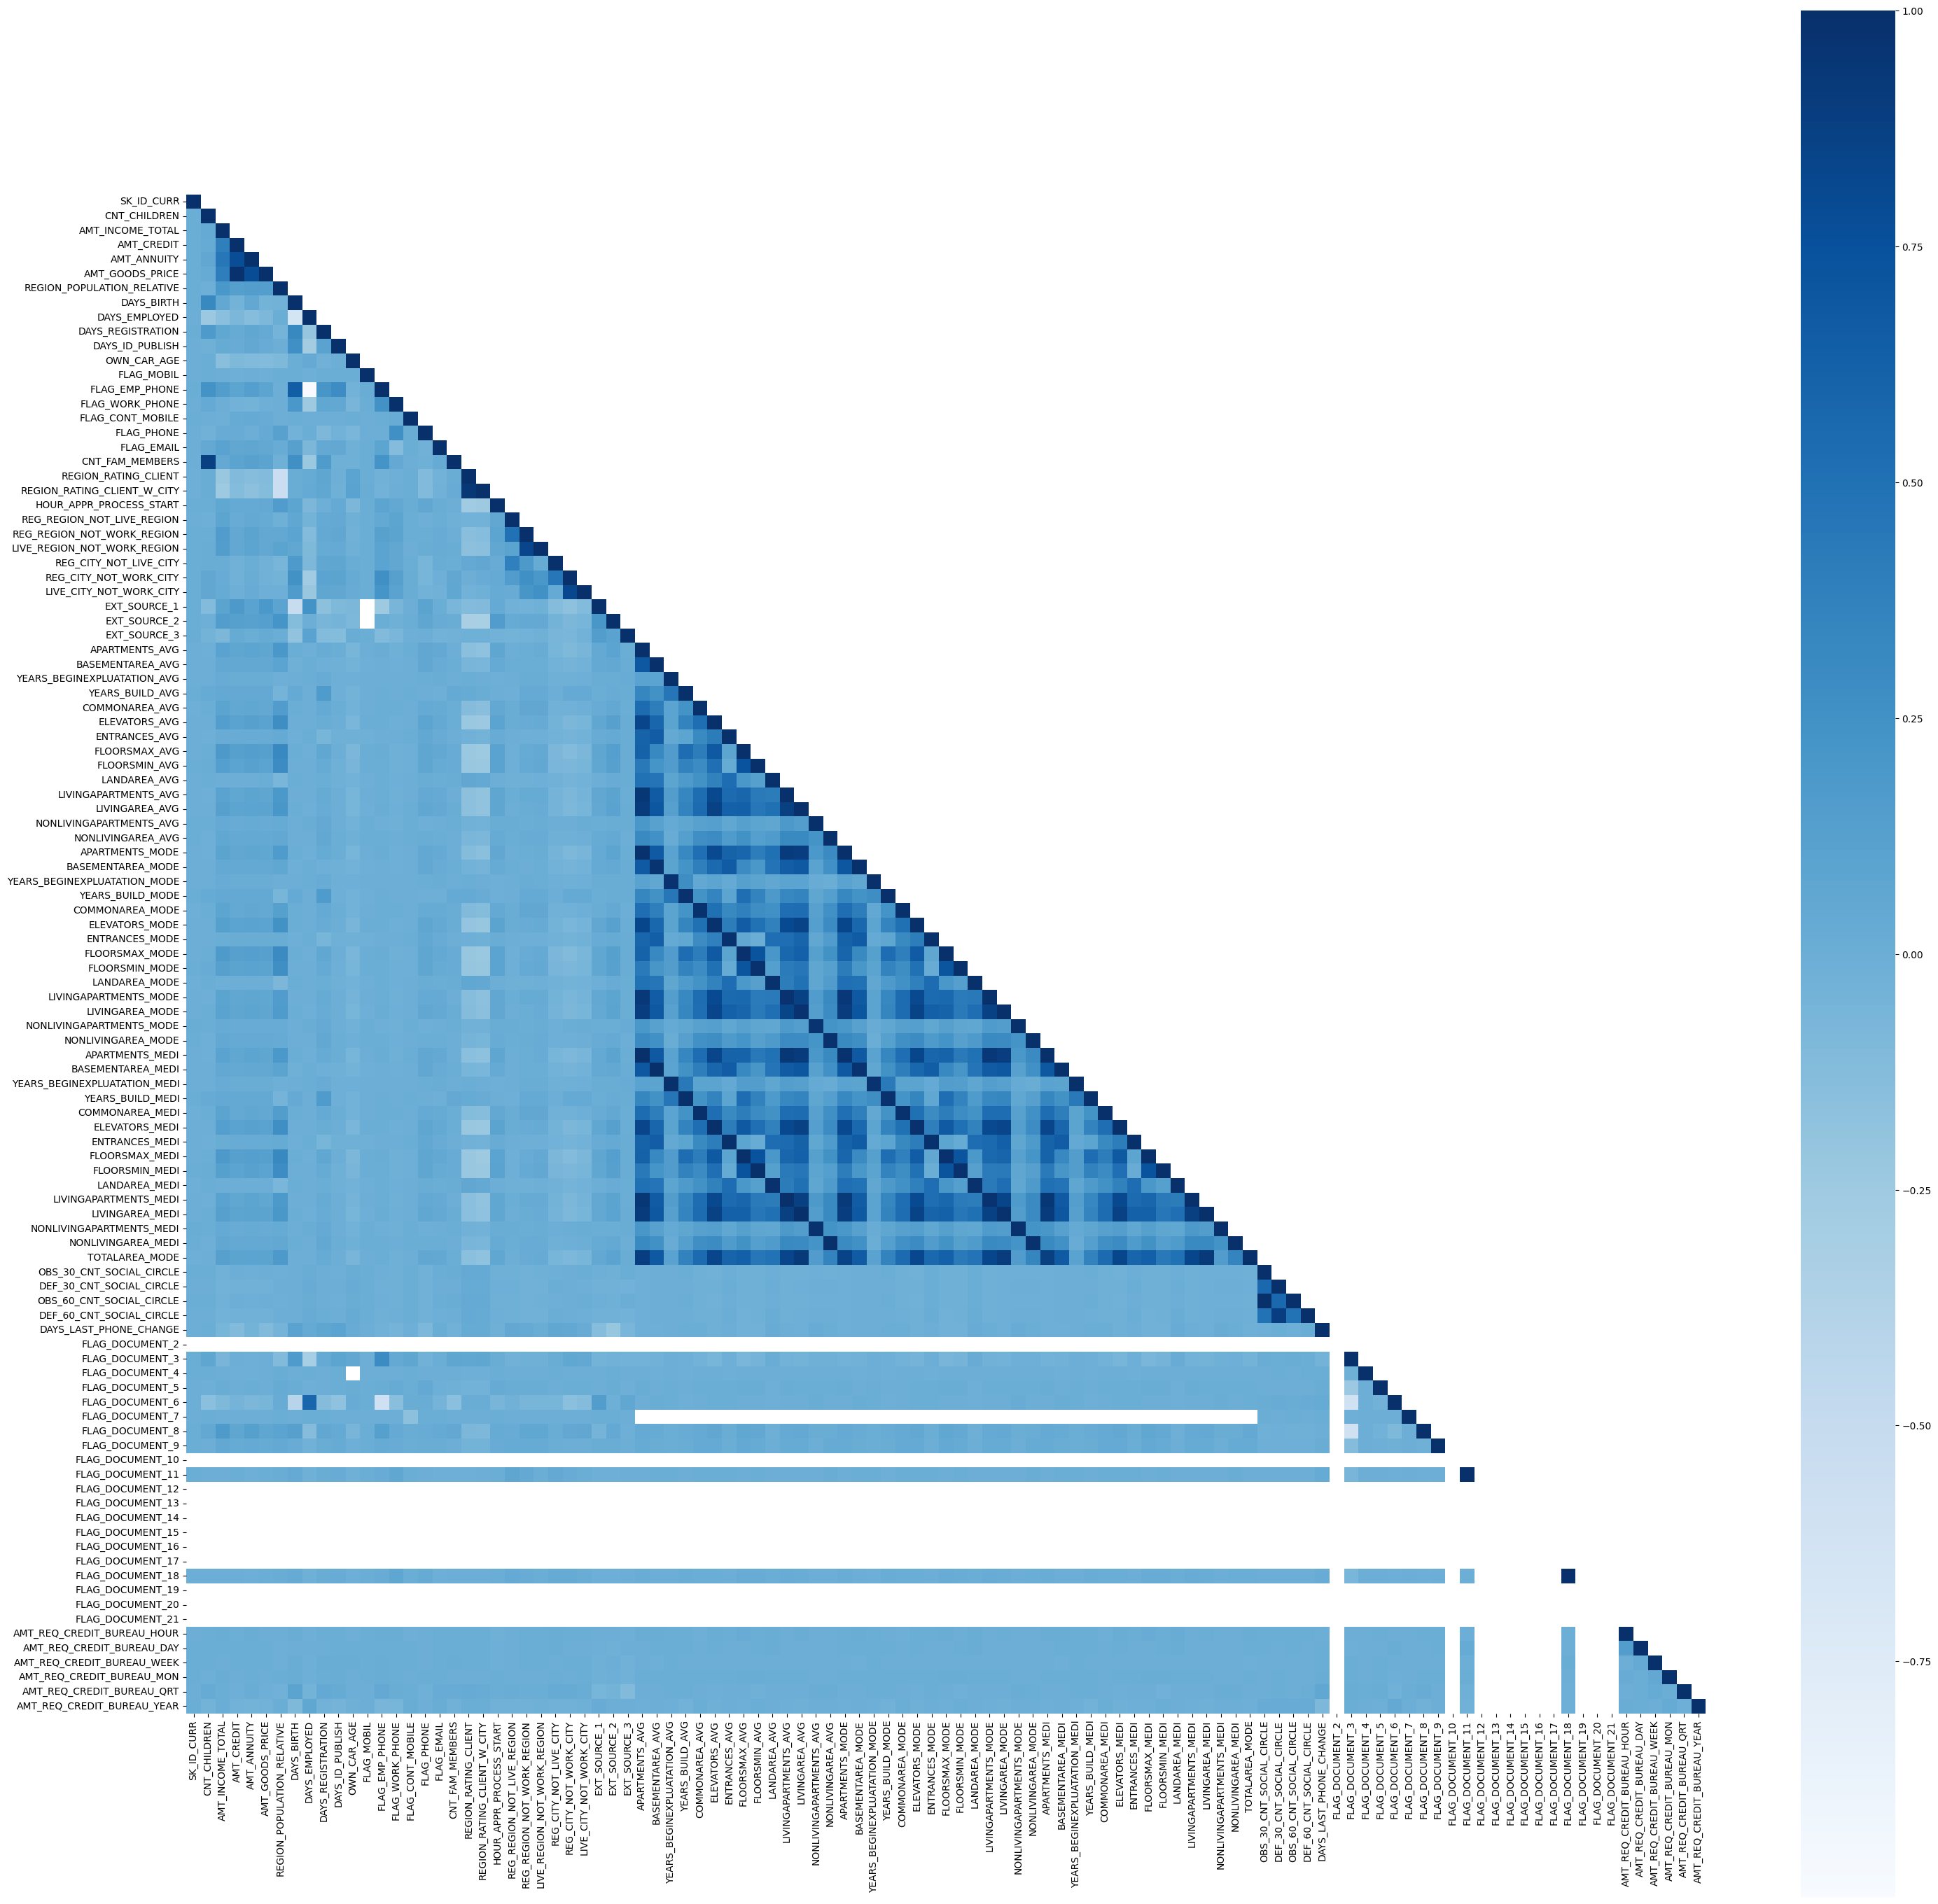

In [24]:
CorrMatrix = DatasetTest.corr(numeric_only = True)
mask = np.array(CorrMatrix)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(35, 35)
sns.heatmap(CorrMatrix, cmap = "Blues", mask = mask, square = True)

In [25]:
HighCorr = []
for i in range(len(CorrMatrix.columns)):
    for j in range(i + 1, len(CorrMatrix.columns)):
        if abs(CorrMatrix.iloc[i,j]) > 0.8:
            HighCorr.append((CorrMatrix.columns[i], CorrMatrix.columns[j]))
delete = []
for pair in HighCorr:
    if pair[0] not in delete:
        delete.append(pair[1])
DatasetTest = DatasetTest.drop(delete, axis=1)

In [26]:
minus = []
for column in DatasetTest.columns:
    if DatasetTest[column].dtype != "object" and DatasetTest[column].max() < 0:
        minus.append(column)
DatasetTest = DatasetTest.drop(minus, axis=1)

array([[<AxesSubplot: title={'center': 'CNT_CHILDREN'}>,
        <AxesSubplot: title={'center': 'AMT_INCOME_TOTAL'}>,
        <AxesSubplot: title={'center': 'AMT_CREDIT'}>,
        <AxesSubplot: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot: title={'center': 'DAYS_EMPLOYED'}>,
        <AxesSubplot: title={'center': 'DAYS_REGISTRATION'}>],
       [<AxesSubplot: title={'center': 'DAYS_ID_PUBLISH'}>,
        <AxesSubplot: title={'center': 'OWN_CAR_AGE'}>,
        <AxesSubplot: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot: title={'center': 'EXT_SOURCE_1'}>,
        <AxesSubplot: title={'center': 'EXT_SOURCE_2'}>,
        <AxesSubplot: title={'center': 'EXT_SOURCE_3'}>],
       [<AxesSubplot: title={'center': 'APARTMENTS_AVG'}>,
        <AxesSubplot: title={'center': 'BASEMENTAREA_AVG'}>,
        <AxesSubplot: title={'center': 'YEARS_BEGINEXPLUATATION_AVG'}>,
        <AxesSubplot: title={'center': 'YEARS_BUILD_AVG'}>,
        <AxesSubplot: title

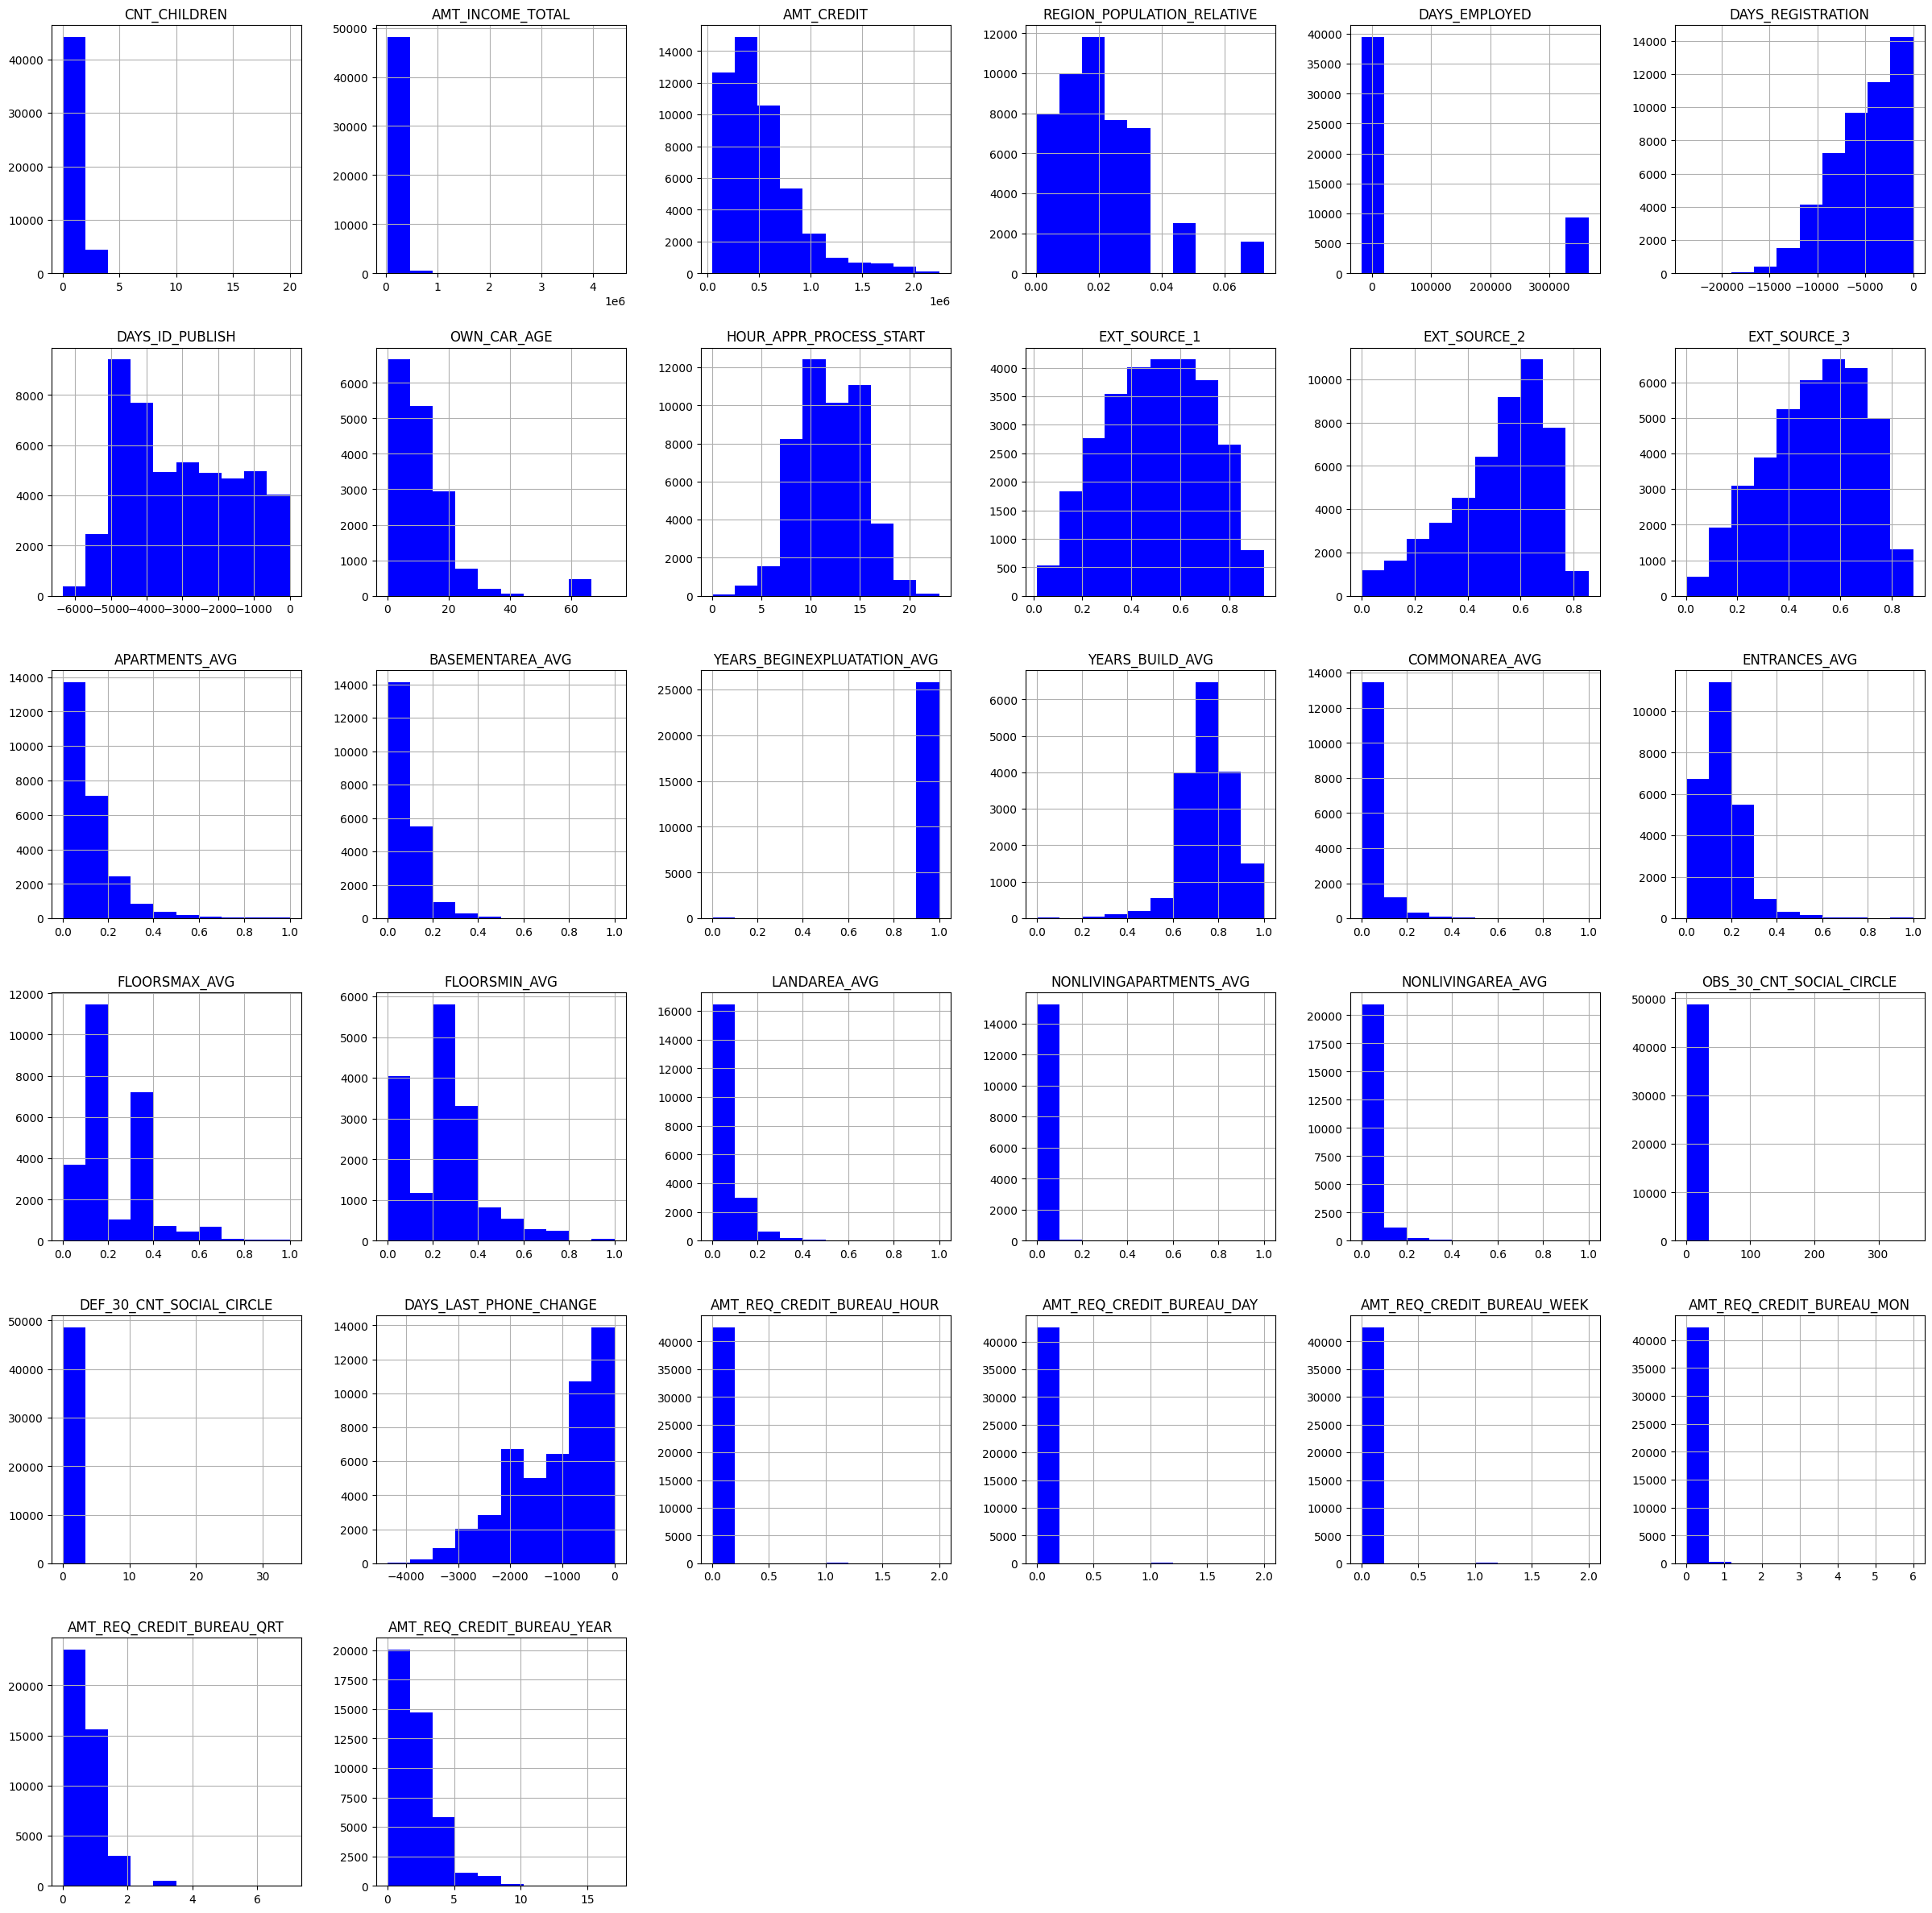

In [27]:
DatasetTest[NumericCols].hist(figsize = (30, 30), color = 'b')

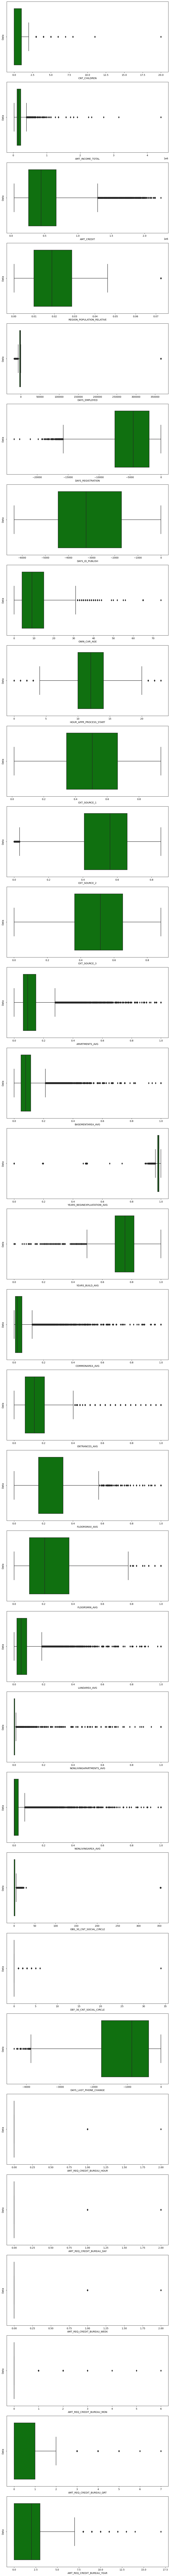

In [28]:
fig, axes = plt.subplots(nrows=len(NumericCols), ncols=1, figsize=(10, 150))
for i, column in enumerate(NumericCols):
    sns.boxplot(x = DatasetTest[column], ax = axes[i], color = "green")
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel("Data", fontsize=10)
plt.tight_layout()
plt.show()

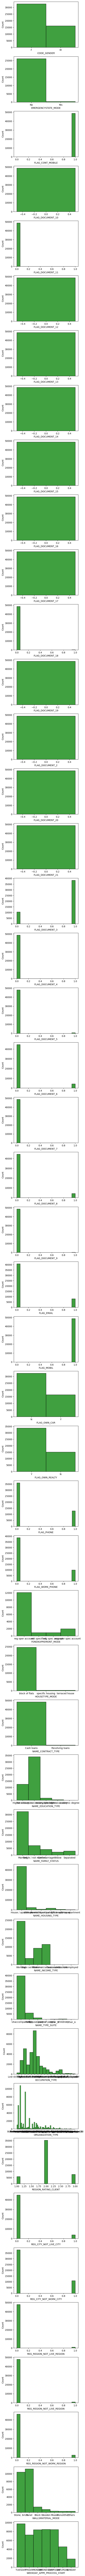

In [29]:
fig, axes = plt.subplots(nrows = len(CategoricCols), ncols = 1)
fig.set_size_inches(5, 200)
for i, column in enumerate(CategoricCols):
    sns.histplot(DatasetTest[column], kde = False, ax = axes[i], color = "green")
plt.show()

Час закодувати категоріальні стовпці у обох датасетах

In [30]:
LabelEnc = LabelEncoder()
for column in ObjectCols:
    if len(list(DatasetTrain[column].unique())) <= 2:
            DatasetTrain[column] = LabelEnc.fit_transform(DatasetTrain[column])
            DatasetTest[column] = LabelEnc.transform(DatasetTest[column])
DatasetTrain = pd.get_dummies(DatasetTrain)
DatasetTest = pd.get_dummies(DatasetTest)
tgt = DatasetTrain["TARGET"] 
DatasetTrain, DatasetTest = DatasetTrain.align(DatasetTest, join = 'inner', axis=1)

І заповнити у них пропущені значення

In [31]:
SimpImp = SimpleImputer(strategy='mean') 
DatasetTrain = pd.DataFrame(SimpImp.fit_transform(DatasetTrain), columns = DatasetTrain.columns) 
DatasetTest = pd.DataFrame(SimpImp.transform(DatasetTest), columns = DatasetTest.columns) 
DatasetTrain["TARGET"] = tgt

Нарешті можемо почати класифікацію

In [32]:
buffer = DatasetTrain.drop(columns = ["TARGET"])
xTrain, xTest, yTrain, yTest = train_test_split(buffer, DatasetTrain["TARGET"], test_size = 0.2)

SS = StandardScaler()
xTrainSS = SS.fit_transform(xTrain)
xTestSS = SS.transform(xTest)
SStest = SS.transform(DatasetTest)

LogRegr = LogisticRegression(class_weight = "balanced", max_iter = 1500, tol = 0.001)
LogRegr.fit(xTrainSS, yTrain)
TrainPred = LogRegr.predict(xTrainSS)
print(roc_auc_score(yTrain, TrainPred))
TestPred = LogRegr.predict(xTestSS)
print(roc_auc_score(yTest, TestPred))

0.682220043878731
0.6808137482138373


Значення roc auc доволі великі тож результат нас влаштовує

In [33]:
ProbaPred = LogRegr.predict_proba(SStest)[:, 1]
DatasetTest = DatasetTest.astype({"SK_ID_CURR": int})
res = pd.DataFrame({"SK_ID_CURR": DatasetTest["SK_ID_CURR"], "TARGET": ProbaPred}).to_csv('submission.csv', index = False)